Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 018
Code Title: | Emerging Technologies in CpE 1 - Fundamentals of Computer Vision
1st Semester | AY 2023-2024
<hr> | <hr>
<u>**ACTIVITY NO.** | **TITLE**
**Name** | Cabacungan, John Martin C.
**Section** | CPE32S3
**Date Performed**: | 21/02/2025
**Date Submitted**: | 21/02/2025
**Instructor**: |  Engr. Roman M. Richard

<hr>

## 1. Objectives

This activity aims to introduce students to openCV's APIs for Hough Transform.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Utilize openCV for circle and line detection.
* Analyze the use of hough Line and Circle function for finding objects in an image.

## 3. Procedures and Outputs

Detecting edges and contours are not only common and important tasks, they also constitute the basis for other complex operations. Lines and shape detection go hand in hand with edge and contour detection, so let's examine how OpenCV implements these.

### Line Detection

The theory behind lines and shape detection has its foundation in a technique called the Hough transform, invented by Richard Duda and Peter Hart, who extended (generalized) the work done by Paul Hough in the early 1960s.

Let's take a look at OpenCV's API for the Hough transforms.

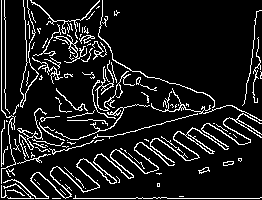

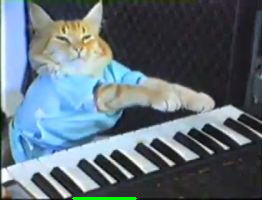

In [1]:
# Image source: https://en.wikipedia.org/wiki/Keyboard_Cat

from google.colab.patches import cv2_imshow
import cv2
import numpy as np

img = cv2.imread('/content/Keyboard_cat.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,120)
minLineLength = 20
maxLineGap = 5
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,
        maxLineGap)
for x1,y1,x2,y2 in lines[0]:
  cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv2_imshow(edges)
cv2_imshow(img)

The crucial point of this simple script —aside from the HoughLines function call— is the setting of minimum line length (shorter lines will be discarded) and the maximum line gap, which is the maximum size of a gap in a line before the two segments start being considered as separate lines.

Also note that the HoughLines function takes a single channel binary image, processed through the Canny edge detection filter. Canny is not a strict requirement, however; an image that's been denoised and only represents edges, is the ideal source for a Hough transform, so you will find this to be a common practice.

The parameters of HoughLinesP are as follows:
- The image we want to process.
- The geometrical representations of the lines, rho and theta, which are usually 1 and np.pi/180.
- The threshold, which represents the threshold below which a line is discarded. The Hough transform works with a system of bins and votes, with each bin representing a line, so any line with a minimum of the <threshold> votes is retained, the rest discarded.
- MinLineLength and MaxLineGap, which we mentioned previously

**Questions:**

1. Which line of code is responsible for setting the minimum line length?
2. What is the mathematical formula for Hough transform and explain how it finds lines.



*   The line of code that is responsible for setting the minimum line length is the minLineLength = 20, after setting the value it is used for a function cv2.HoughLinesP. Which then the function can be run for the detection of lines.
*   The Hough Transform uses \( r = x \cos\θ + y \sin\θ\) to transfer edge points to \((r, \θ)\) space. An accumulator matrix is useful for identifying broken lines since its peaks show identified lines.



### Circle Detection

OpenCV also has a function for detecting circles, called HoughCircles. It works in a very similar fashion to HoughLines, but where minLineLength and maxLineGap were the parameters to discard or retain lines, HoughCircles has a minimum distance between circles' centers, minimum, and maximum radius of the circles. Here's the obligatory example:

Before going into the sample code, check first: **What is the HoughCircles function and what are its parameters?**

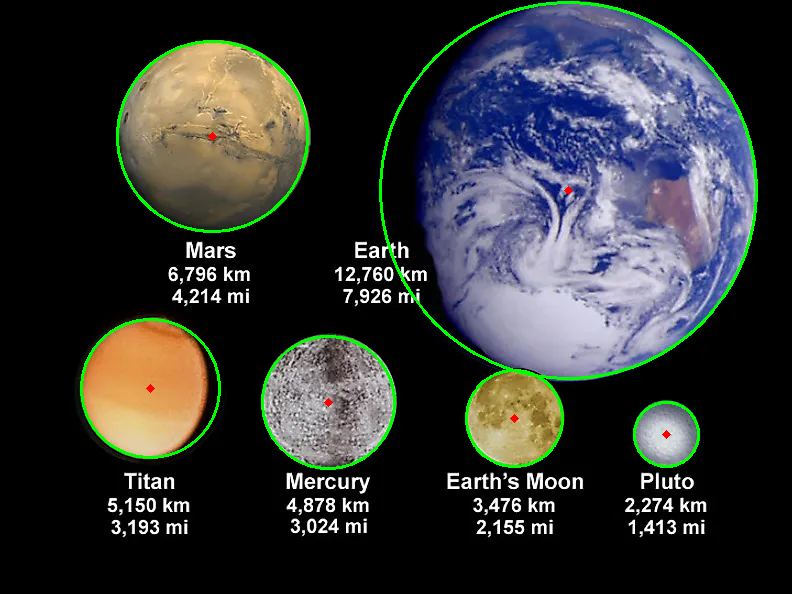

In [11]:
import cv2
import numpy as np

# Our testing value
n = 19

planets = cv2.imread('/content/planets.jpg')
gray_img = cv2.cvtColor(planets, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, n) # We will change this value passed as parameter and observe results
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,
                            param1=100,param2=30,minRadius=0,
                                maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
  # draw the outer circle
  cv2.circle(planets,(i[0],i[1]),i[2],(0,255,0),2)
  # draw the center of the circle
  cv2.circle(planets,(i[0],i[1]),2,(0,0,255),3)

cv2.imwrite("planets_circles.jpg", planets)
cv2_imshow(planets)

What happens to the code once you run **and the value of n is 5**?

The circle that surrounds the planets are not aacurate, some of the planets have a circle surround them but there are alot of circles in a image. lower n = high tolerance of the detection.

Change the value to 9, **what happens to the image**?

The detection of the cicle seem to have lessen from the last value of n. But some of the planets didn't detected yet meaning the circle.

Lastly, change the value to 15, **what can you say about the resulting image?**

When changing the value of n to 15 the detection of circles seem to have lessen and the planets have been detected by the code. The planet earth seem to have many circles but haven't really detected by the code yet.

Provide an analysis of the output so far. How does the code help the changes in the resulting image?

The results of the image is based on the process of the detection of the code meaning the high the n value is the accurate the detection of the code in a image that contains a circle shape.

## 4. Supplementary Activity

The attached image contains coins used in the Philippines.

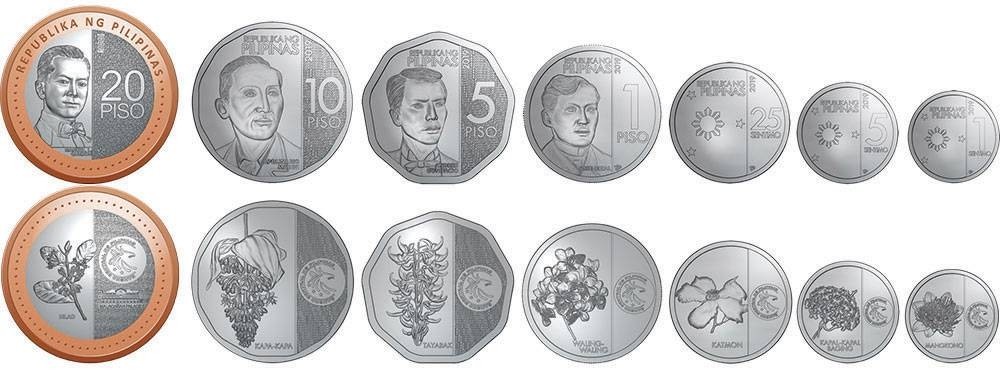

Your job is to count the amount of coins (denomation not included, no sum of prices; just the amount of coins present) through either line detection or circle detection.

- Create a function using line detection and pass this image as parameter, what is the output? Can you use houghlines to count circles?
- Create a function using circle detection and pass this image as parameter, show the output? Can you use houghcircles to count the circles?

Total Coins Detected (Circles): 15


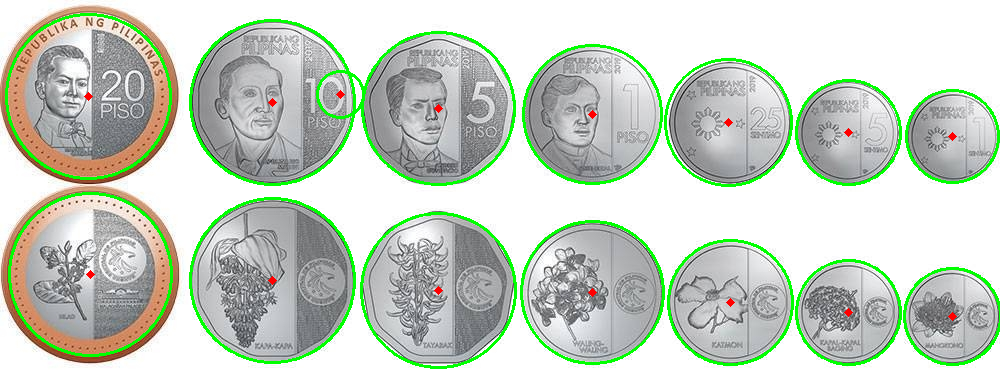

In [18]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def detect_circles(img):
    # Load the image
    img = cv2.imread('/content/coins_ph.jpg')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur
    blurred = cv2.GaussianBlur(gray, (15, 15), 0)

    # Detect circles using HoughCircles
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, 1, minDist=50,
                               param1=50, param2=30, minRadius=20, maxRadius=100)

    # Draw detected circles
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)  # Draw circle
            cv2.circle(img, (i[0], i[1]), 2, (0, 0, 255), 3)  # Draw center
        print(f"Total Coins Detected (Circles): {len(circles[0])}")

    # Show the image with detected circles
    cv2_imshow(img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Run the function
detect_circles("/mnt/data/coins_ph.jpg")

The output of the code symbolizes that HoughCircles is the best detection to use since it counts the circles present in the photo.

Total Lines Detected: 540


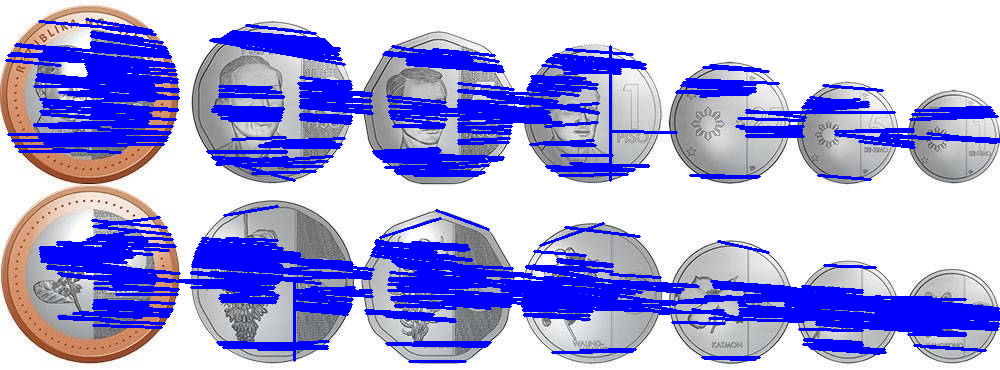

In [23]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def detect_lines(img1):
    # Load the image
    img1 = cv2.imread('/content/coins_ph.jpg')
    gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

    # Apply Canny Edge Detection
    edges = cv2.Canny(gray, 50, 150)

    # Detect lines using HoughLinesP
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=50, maxLineGap=10)

    # Draw detected lines
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(img1, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Draw line
        print(f"Total Lines Detected: {len(lines)}")

    # Show the image with detected lines
    cv2_imshow(img1)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Run the function
detect_lines("/mnt/data/coins_ph.jpg")

The HoughLinesP is not viable in counting the circles since it didn't detect that there are 15 coins present in the photo and it only did line inside the coins.

## 5. Summary, Conclusions and Lessons Learned

In this activity i learned about two detections which are line detection using HoughLinesP which detects any lines as it only detects straight lines, while HoughCircles is used by detecting any round / circles found in a image. Thanks to this, we can see how many lines/circles are in a photo.

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*